In [80]:
# importing important libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.api import qqplot

In [81]:
data = pd.read_csv('daily-total-female-births-CA.csv')

In [82]:
data.head(50)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


In [83]:
# convert the row index into date
data = pd.read_csv('daily-total-female-births-CA.csv' , index_col= [0] )
data.head(50)

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
1959-01-06,29
1959-01-07,45
1959-01-08,43
1959-01-09,38


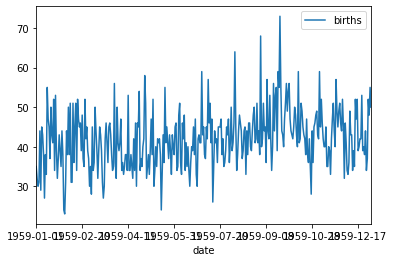

In [84]:
data.plot()

In [85]:
# also known as smoothing
moving_average = data.rolling(window = 20).mean()

In [86]:
moving_average

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,42.10
1959-12-28,42.25
1959-12-29,42.50


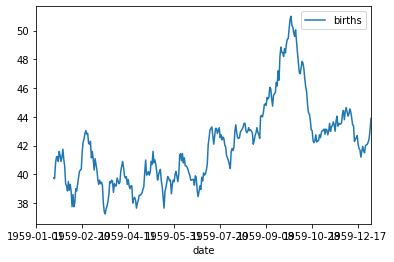

In [87]:
moving_average.plot()

In [24]:
sm.stats.durbin_watson(data) # very less correlation

array([0.04624491])

In [88]:
data.values.squeeze()

array([35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50,
       43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44,
       38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48,
       37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32,
       39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35,
       56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34,
       34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58,
       51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38,
       24, 34, 43, 36, 55, 41, 45, 41, 37, 43, 39, 33, 43, 40, 38, 45, 46,
       34, 35, 48, 51, 36, 33, 46, 42, 48, 34, 41, 35, 40, 34, 30, 36, 40,
       39, 45, 38, 47, 33, 30, 42, 43, 41, 41, 59, 43, 45, 38, 37, 45, 42,
       57, 46, 51, 41, 47, 26, 35, 44, 41, 42, 36, 45, 45, 45, 47, 38, 42,
       35, 36, 39, 45, 43, 47, 36, 41, 50, 39, 41, 46, 64, 45, 34, 38, 44,
       48, 46, 44, 37, 39

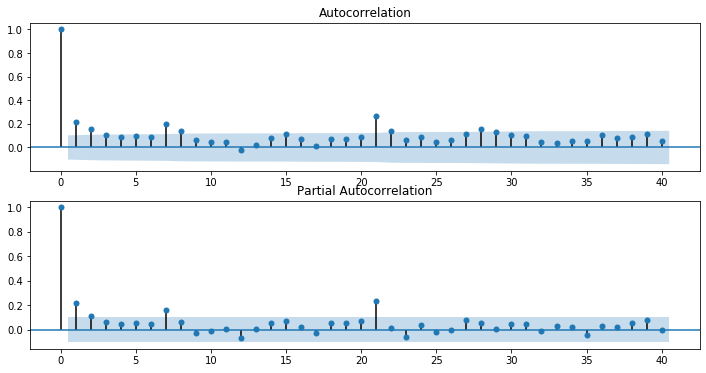

In [89]:
# ploting graph
fig = plt.figure(figsize=(12 , 6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze() , ax = ax1 , lags = 40)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.values.squeeze() , ax = ax2 , lags = 40)

In [90]:
# split the data into training and testing
training_data = data[:320]
testing_data = data[320:]

In [97]:
arima  = ARIMA(training_data , order = (3 , 1 , 3)) # order(p ,q ,d)

/home/harish/Downloads/ENTER/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/harish/Downloads/ENTER/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [98]:
# fitting the model
model = arima.fit()

In [99]:
# aim is to reduce this aic score by chosing the best value of p , q, d
model.aic

2160.007727698116

In [106]:
# predict the future values 
pred= model.forecast(steps = 45)[0]

In [107]:
pred

array([44.62188476, 44.79194897, 44.11840705, 43.39193329, 43.18875255,
       43.67253465, 44.48664279, 45.02723081, 44.90056916, 44.21895843,
       43.51289263, 43.32810352, 43.81355004, 44.61139321, 45.13016985,
       44.99264716, 44.31925713, 43.63417293, 43.46721196, 43.95389562,
       44.73555187, 45.23304121, 45.08522944, 44.42024797, 43.75580968,
       43.60607413, 44.09358176, 44.85913819, 45.33585878, 45.17831395,
       44.5219146 , 43.87778463, 43.74468369, 44.23261874, 44.98217117,
       45.43863594, 45.27189834, 44.62424082, 44.00008004, 43.88303477,
       44.37101691, 45.1046695 , 45.54138551, 45.36597997, 44.72721059])

In [108]:
# mse to find out the accuracy of the trained model
np.sqrt(mean_squared_error(testing_data , pred))

6.459945539734483